In [2]:
import plotly.express as px
import plotly
import pandas as pd
import plotly.io as pio
pio.templates


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [3]:
df = pd.read_excel('OS17A_Risk_2.xlsx', sheet_name='Risk Matrix')
df.head()


,Simulation,Before Likelihood,Before Impact,Before Risk,After Likelihood,After Impact,After Risk,Risk Mitigation,Cost,Duration,Duration (Years)
0,OS16_1_3_10,9,9,18,9,9,18,Baseline (No Risk Mitigation),28527996,1733.1,4.748219
1,OS17_1,7,8,15,6,7,13,Risk 1 (System Integration Risk),28895839,1746.1,4.783836
2,OS17_1_1,7,8,15,6,8,14,Risk 1 (System Integration Risk),29041320,1701.6,4.661918
3,OS17_1_2,7,8,15,4,7,11,Risk 1 (System Integration Risk),30462718,1617.1,4.430411
4,OS17_1_3,7,8,15,6,7,13,Risk 1 (System Integration Risk),30433112,1591.1,4.359178


In [4]:
fig = px.scatter(df, x="Duration (Years)", y="Cost", color = 'Risk Mitigation', template = 'plotly', hover_name = 'After Risk', size = 'After Risk',range_x=[3, 9])
fig.add_vline(x=8, line_width=3, line_dash="dash", line_color="green",  annotation_text="Schedule Target (8 yrs)" )
fig.add_hline(y=30000000, line_width=3, line_dash="dash", line_color="green",  annotation_text="Cost Target (USD 30MM)")
#fig.add_hrect(y0=0, y1=30000000, line_width=0, fillcolor="red", opacity=0.2)
fig.add_shape(type="rect",
    xref="x", yref="y",
    x0=0, y0=25000000,
    x1=8, y1=30000000,
    line=dict(
        color="RoyalBlue",
        width=3,
    ),
    fillcolor="LightGreen",
    opacity = 0.2
)

fig.update_traces(marker=dict(
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
#fig.update_traces(marker=dict(size=df['After Risk']))
fig.update_traces(textposition='bottom center')

fig.show()
fig.write_html("Project_Tradespace_OS17_target.html")


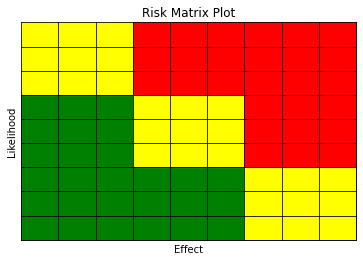

In [5]:
#My Failed attempt at creating a risk matrix using matplotlib - Ignore
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


fig = plt.figure()
plt.xlim((0, 11))
plt.ylim((0, 11))





plt.subplots_adjust(wspace=0, hspace=0)
plt.xticks([])
plt.yticks([])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Effect')
plt.ylabel('Likelihood')
plt.title('Risk Matrix Plot')

#This example is for a 5 * 5 matrix
nrows=9
ncols=9
axes = [fig.add_subplot(nrows, ncols, r * ncols + c + 1) for r in range(0, nrows) for c in range(0, ncols) ]

# remove the x and y ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)

#Add background colors
#This has been done manually for more fine-grained control
#Run the loop below to identify the indice of the axes

#Identify the index of the axes
#for i in range(len(axes)):
#    axes[i].text(0,0, i)

green = [27,28,29,36,37,38,45,46,47,54,55,56,63,64,65,72,73,74,57,58,59,66,67,68,75,76,77] #Green boxes
yellow = [0,1,2,9,10,11,18,19,20,30,31,32,39,40,41,48,49,50,60,61,62,69,70,71,78,79,80]#yellow boxes
#orange = [1 , 2, 7, 12, 13, 18, 19, 24] # orange boxes
red = [3,4,5,6,7,8,12,13,14,15,16,17,21,22,23,24,25,26,33,34,35,42,43,44,51,52,53] #red boxes

for _ in green:
    axes[_].set_facecolor('green')

for _ in yellow:
    axes[_].set_facecolor('yellow')

# for _ in orange:
#     axes[_].set_facecolor('orange')

for _ in red:
    axes[_].set_facecolor('red')




plt.show()